In [2]:
import pandas as pd
import numpy as np
from numpy import absolute
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [11]:
def readCSVFiles():

    df01 = pd.read_csv("bellman_performance_results_final.csv")
    df02 = pd.read_csv("dijkstra_performance_results_final.csv")
    df03 = pd.read_csv("hybrid_performance_results_final.csv")

    return df01, df02, df03

def combineAlgorithmsToFile(df01, df02, df03):
    df01['AlgoBellman'] = 1
    df01['AlgoDijkstra'] = 0
    df01['AlgoHybrid'] = 0
    df02['AlgoBellman'] = 0
    df02['AlgoDijkstra'] = 1
    df02['AlgoHybrid'] = 0
    df03['AlgoBellman'] = 0
    df03['AlgoDijkstra'] = 0
    df03['AlgoHybrid'] = 1
    frames = [df01, df02, df03]
    concat = pd.concat(frames)
    df1 = concat
    
    return df1

def find_approximation(approximation_list, approximation_names):
  
    index = 0
    count = 0
    appr = []
    for i in approximation_list:
        if i == 1:
            count+=1
            appr.append(approximation_names[index])
        index+=1
        
    return count, appr
            
            
def calculate_speedup(df, nv_list, algorithm_name, approximation_list, approximation_names):
    
    count, appr = find_approximation(approximation_list, approximation_names)
    speedup_list = []
    
    for nv in nv_list:

        original_speed = (df.loc[(df['vertexNum'] == nv) & (df[algorithm_name] == 1) &
                         (df['sOriginalDistance'] == 1), 'executionTime'])
        
        group_by_nv = df.loc[(df['vertexNum'] == nv) & (df[algorithm_name] == 1)]
        
        for index,row in group_by_nv.iterrows():
            
            if row['sMinEdgetoProcess'] == approximation_list[0] and row['sPartialGraphProcess'] == approximation_list[1] and row['sReduceExecution'] == approximation_list[2] and row['sApprAttrValues'] == approximation_list[3]:
        
                if row['executionTime'] == 0:
                    speedup = (original_speed/1).to_numpy()[0]
                else:
                    speedup = (original_speed/row['executionTime']).to_numpy()[0]
            
                if count == 1:
                    speedup_list.append([speedup, row['Error'], row[appr[0]]])
                elif count == 2:
                    speedup_list.append([speedup, row['Error'], row[appr[0]], row[appr[1]]])
                elif count == 3:
                    speedup_list.append([speedup, row['Error'], row[appr[0]], row[appr[1]], row[appr[2]]])
                elif count == 4:
                    speedup_list.append([speedup, row['Error'], row[appr[0]], row[appr[1]], row[appr[2]], row[appr[3]]])
                
                
    return speedup_list


def draw_BFDJ(arr1_b, arr2_b, arr1_d, arr2_d, arr1_h, arr2_h, x_label, y_label):
    
    #star = mpath.Path.unit_regular_star(6)
    #rectangle = mpath.Path.unit_rectangle()
    asterisk = mpath.Path.unit_regular_asterisk(6)
    circle = mpath.Path.unit_circle()
    rectangle = mpath.Path.unit_rectangle()

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(arr2_b, arr1_b, color='red', label='bellman-ford', marker=asterisk, markersize=7)
    ax.plot(arr2_d, arr1_d, color='blue', label='dijkstra', marker=circle, markersize=4)
    ax.plot(arr2_h, arr1_h, color='green', label='hybrid', marker=rectangle, markersize=4)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    plt.legend()
    plt.show()
    
    
def 

def prepare_draw(s, error, approximation):

    for c in range(6):

        arr1_b, arr2_b, arr1_d, arr2_d, arr1_h, arr2_h = []

        count = 1
        for i in iterationNum_list_b[c]:
            arr1_b.append(i[s])
            arr2_b.append(count)
            count+=1

        count = 1
        for i in iterationNum_list_d[c]:
            arr1_d.append(i[s])
            arr2_d.append(count)
            count+=1
            
        count = 1
        for i in iterationNum_list_h[c]:
            arr1_h.append(i[s])
            arr2_h.append(count)
            count+=1

            
        draw_BFDJ(arr1_b, arr2_b, arr1_d, arr2_d, arr1_h, arr2_h, "iteration number", soe)


In [17]:
df_b, df_d, df_h = readCSVFiles()
df = combineAlgorithmsToFile(df_b, df_d, df_h)
nv_list = df_b.vertexNum.unique()

approximation_list = [1, 1, 0, 0]
approximation_names = ['minProcessEdge', 'percentage', 'iterationNum', 'sApprAttrValues']

s = calculate_speedup(df, nv_list, 'AlgoDijkstra', approximation_list, approximation_names)
print(s)

[]


In [65]:
#df = pd.DataFrame(data, columns = ['Algo', 'VertexNum', 'speedup', 'inaccuracy'])





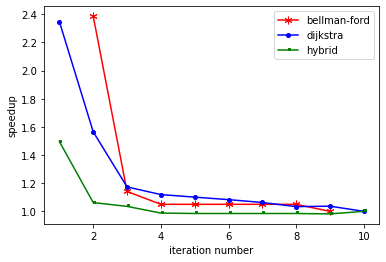

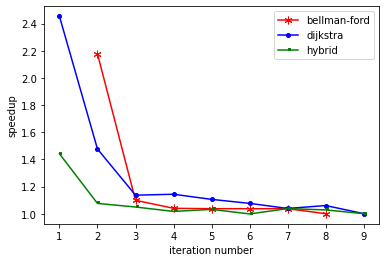

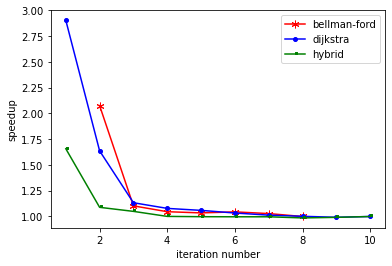

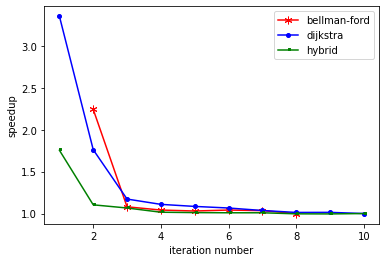

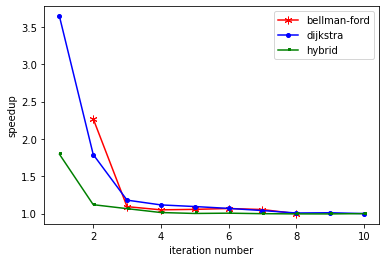

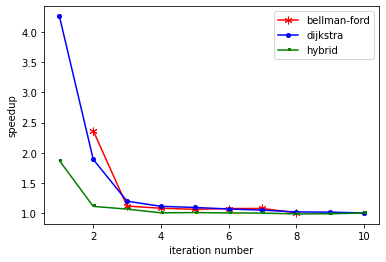

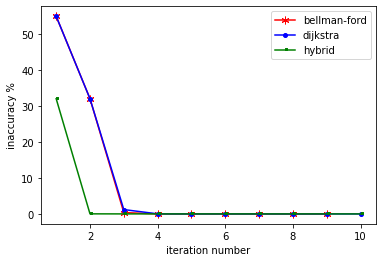

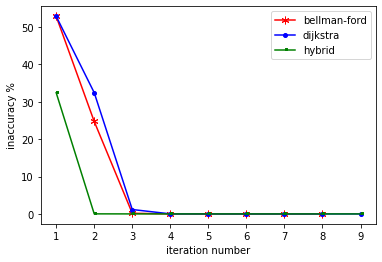

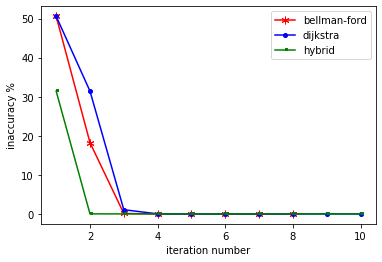

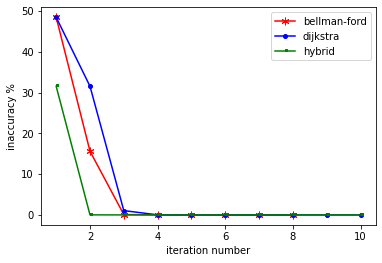

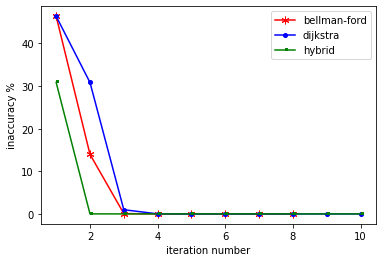

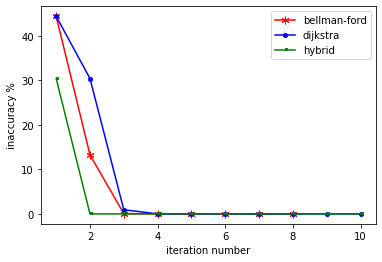

In [66]:
prepare_draw_iteration_num(0, "speedup")
prepare_draw_iteration_num(1, "inaccuracy %")

In [67]:
def prepare_draw_minProcessEdge(s, soe):

    for c in range(6):

        arr1_b = []
        arr2_b = []

        arr1_d = []
        arr2_d = []
        
        arr1_h = []
        arr2_h = []
 
        for i in minProcessEdge_list_b[c]:
            arr1_b.append(i[s])
            arr2_b.append(i[2])


        for i in minProcessEdge_list_d[c]:
            arr1_d.append(i[s])
            arr2_d.append(i[2])
            
       
        for i in minProcessEdge_list_h[c]:
            arr1_h.append(i[s])
            arr2_h.append(i[2])

            
        draw_BFDJ(arr1_b, arr2_b, arr1_d, arr2_d, arr1_h, arr2_h, "min processing edge", soe)
     
        
        


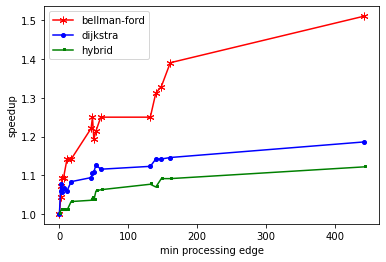

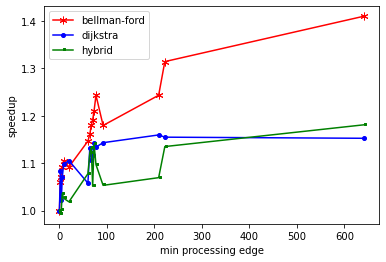

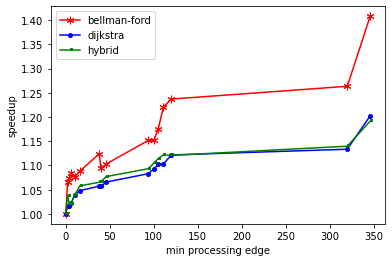

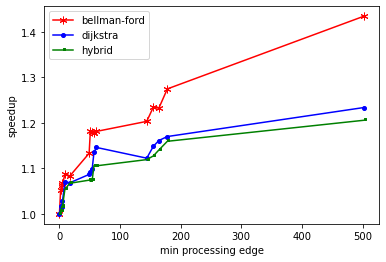

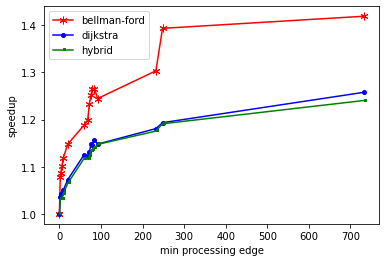

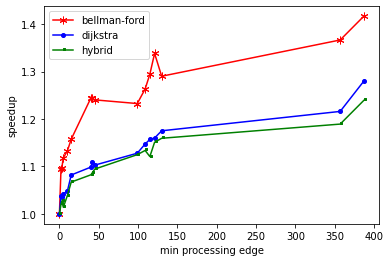

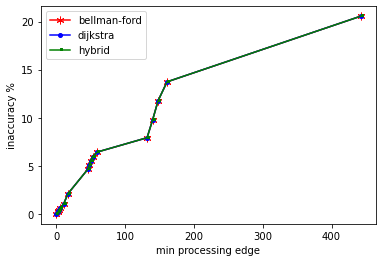

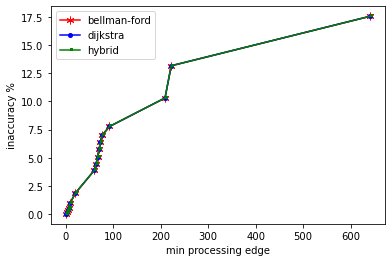

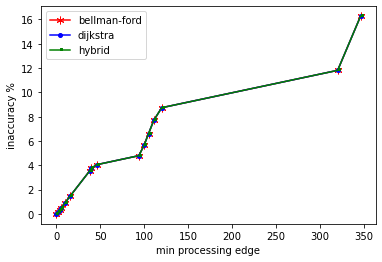

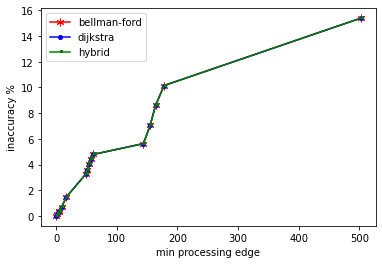

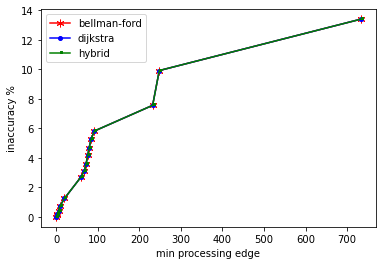

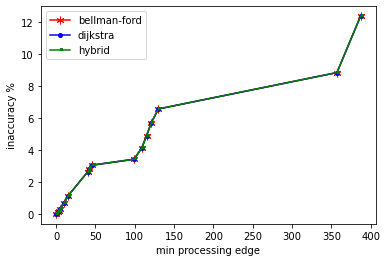

In [68]:
prepare_draw_minProcessEdge(0, "speedup")
prepare_draw_minProcessEdge(1, "inaccuracy %")

In [69]:
def prepare_draw_partialGraphProcess(s, soe):

    for c in range(6):

        arr1_b = []
        arr2_b = []

        arr1_d = []
        arr2_d = []
        
        arr1_h = []
        arr2_h = []

        for i in percentage_list_b[c]:
            arr1_b.append(i[s])
            arr2_b.append(i[2])

        '''
        for i in percentage_list_d[c]:
            arr1_d.append(i[s])
            arr2_d.append(i[2])
        '''    
            
        draw_BFDJ(arr1_b, arr2_b, arr1_d, arr2_d, arr1_h, arr2_h, "partialGraphProcess", soe)
    
        

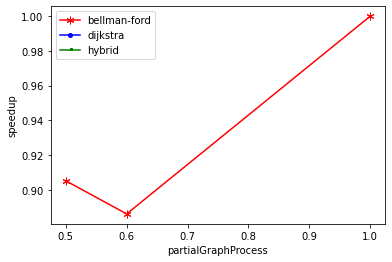

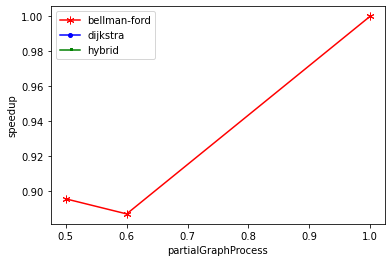

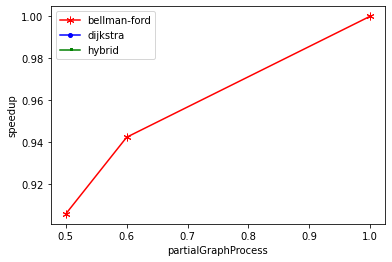

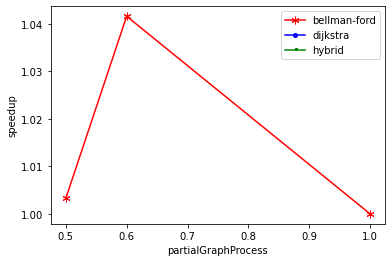

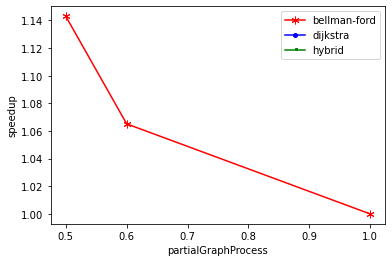

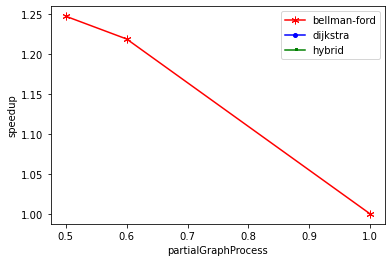

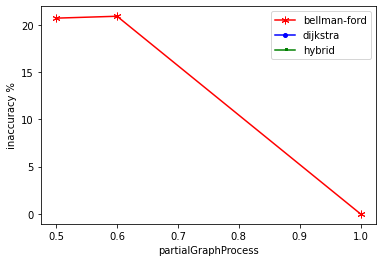

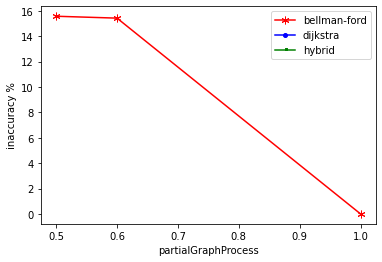

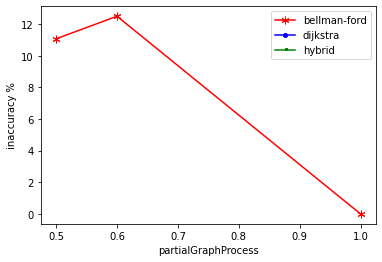

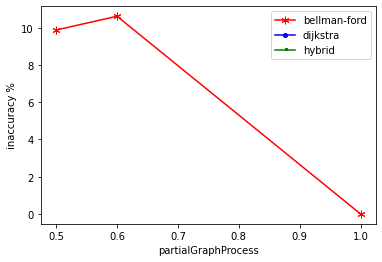

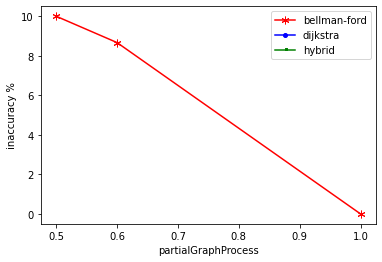

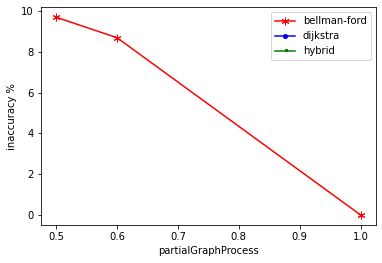

In [70]:
prepare_draw_partialGraphProcess(0, "speedup")
prepare_draw_partialGraphProcess(1, "inaccuracy %")

In [71]:
data = [];

l = ["DJ", "ReduceExecution"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in iterationNum_list_d:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)

l = ["DJ", "MinEdgetoProcess"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in minProcessEdge_list_d:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)


l = ["HY", "ReduceExecution"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in iterationNum_list_h:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)

l = ["HY", "MinEdgetoProcess"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in minProcessEdge_list_h:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)


l = ["BF", "ReduceExecution"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in iterationNum_list_b:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)

l = ["BF", "MinEdgetoProcess"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in minProcessEdge_list_b:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)


l = ["BF", "PartialGraphProcess"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in percentage_list_b:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)

df = pd.DataFrame(data, columns = ['Algo', 'Technique', 'mean-speedup', 'mean-inaccuracy'])

df

,Algo,Technique,mean-speedup,mean-inaccuracy
0,DJ,ReduceExecution,1.323370,8.327331
1,DJ,MinEdgetoProcess,1.062826,4.418123
2,HY,ReduceExecution,1.084851,3.216976
3,HY,MinEdgetoProcess,1.077070,4.418120
4,BF,ReduceExecution,inf,8.278942
5,BF,MinEdgetoProcess,1.199936,4.417539
6,BF,PartialGraphProcess,1.043089,8.216703


In [72]:
data = [];
p = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for j in  range(1,16):
    
    l = ["DJ", "MinEdgetoProcess"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += minProcessEdge_list_d[i][j][0]
        errorSum += minProcessEdge_list_d[i][j][1]

    l.append(p[j-1])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)


    
for j in  range(1,16):
    
    l = ["HY", "MinEdgetoProcess"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += minProcessEdge_list_h[i][j][0]
        errorSum += minProcessEdge_list_h[i][j][1]

    l.append(p[j-1])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)
    
    


for j in  range(1,16):
    
    l = ["BF", "MinEdgetoProcess"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += minProcessEdge_list_b[i][j][0]
        errorSum += minProcessEdge_list_b[i][j][1]

    l.append(p[j-1])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)


df = pd.DataFrame(data, columns = ['Algo', 'Technique','percentaile-compared-edge-number', 'mean-speedup', 'mean-inaccuracy'])

df

,Algo,Technique,percentaile-compared-edge-number,mean-speedup,mean-inaccuracy
0,DJ,MinEdgetoProcess,0.40,1.045819,0.132252
1,DJ,MinEdgetoProcess,0.50,1.031272,0.278151
2,DJ,MinEdgetoProcess,0.60,1.044126,0.450108
3,DJ,MinEdgetoProcess,0.70,1.064722,0.775627
4,DJ,MinEdgetoProcess,0.80,1.070738,1.422323
5,DJ,MinEdgetoProcess,0.90,1.082032,3.088689
6,DJ,MinEdgetoProcess,0.91,1.099434,3.924252
7,DJ,MinEdgetoProcess,0.92,1.101312,4.382310
8,DJ,MinEdgetoProcess,0.93,1.118212,4.937786
9,DJ,MinEdgetoProcess,0.94,1.130759,5.485524


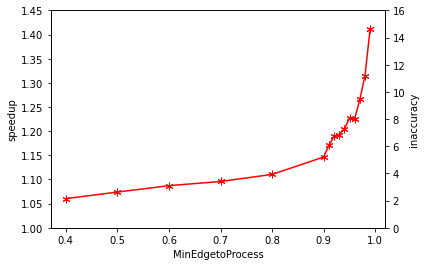

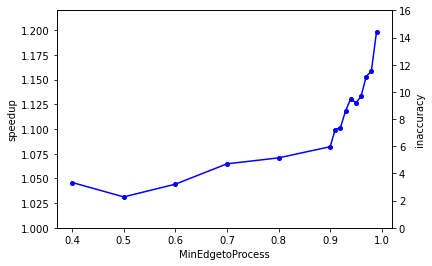

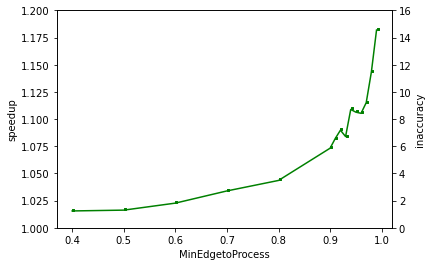

In [73]:
asterisk = mpath.Path.unit_regular_asterisk(6)
circle = mpath.Path.unit_circle()
rectangle = mpath.Path.unit_rectangle()


t = p
s1 = df.loc[df['Algo'] == 'BF']['mean-speedup']
s2 = df.loc[df['Algo'] == 'DJ']['mean-speedup']
s3 = df.loc[df['Algo'] == 'HY']['mean-speedup']


fig, ax1 = plt.subplots()

ax1.plot(t, s1, color='red', label='bellman-ford', marker=asterisk, markersize=7)
#ax1.plot(t, s2, color='blue', label='dijkstra', marker=circle, markersize=4)

ax1.set_xlabel('MinEdgetoProcess')
mn, mx = ax1.set_ylim(1, 1.45)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 16)
ax2.set_ylabel('inaccuracy')

plt.show()


fig, ax1 = plt.subplots()

#ax1.plot(t, s1, color='red', label='bellman-ford', marker=asterisk, markersize=7)
ax1.plot(t, s2, color='blue', label='dijkstra', marker=circle, markersize=4)

ax1.set_xlabel('MinEdgetoProcess')
mn, mx = ax1.set_ylim(1, 1.22)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 16)
ax2.set_ylabel('inaccuracy')


plt.show()


fig, ax1 = plt.subplots()

#ax1.plot(t, s1, color='red', label='bellman-ford', marker=asterisk, markersize=7)
ax1.plot(t, s3, color='green', label='hybrid', marker=rectangle, markersize=4)

ax1.set_xlabel('MinEdgetoProcess')
mn, mx = ax1.set_ylim(1, 1.2)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 16)
ax2.set_ylabel('inaccuracy')


plt.show()
    



In [74]:
data = [];
p = [1, 2, 3, 4, 5, 6, 7]

for j in  range(1,7):
    
    l = ["DJ", "ReduceExecution"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += iterationNum_list_d[i][j][0]
        errorSum += iterationNum_list_d[i][j][1]

    l.append(p[j-1])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)
    
    
for j in  range(1,7):
    
    l = ["HY", "ReduceExecution"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += iterationNum_list_h[i][j][0]
        errorSum += iterationNum_list_h[i][j][1]

    l.append(p[j-1])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)


for j in  range(0,7):
    
    l = ["BF", "ReduceExecution"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += iterationNum_list_b[i][j][0]
        errorSum += iterationNum_list_b[i][j][1]

    l.append(p[j])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)


df = pd.DataFrame(data, columns = ['Algo', 'Technique','iter-number', 'mean-speedup', 'mean-inaccuracy'])

df

,Algo,Technique,iter-number,mean-speedup,mean-inaccuracy
0,DJ,ReduceExecution,1,1.646094,31.662390
1,DJ,ReduceExecution,2,1.159286,1.101382
2,DJ,ReduceExecution,3,1.113398,0.015339
3,DJ,ReduceExecution,4,1.089082,0.000988
4,DJ,ReduceExecution,5,1.065820,0.000780
5,DJ,ReduceExecution,6,1.038448,0.001018
6,HY,ReduceExecution,1,1.090076,0.015116
7,HY,ReduceExecution,2,1.053330,0.001025
8,HY,ReduceExecution,3,1.007061,0.001192
9,HY,ReduceExecution,4,1.005514,0.001012


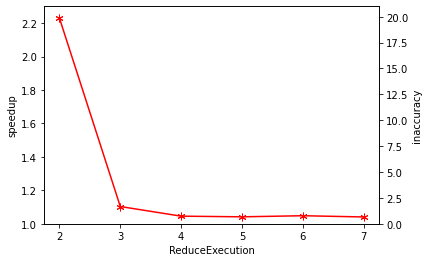

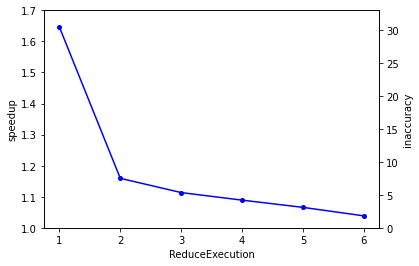

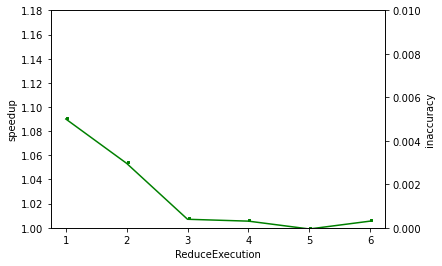

In [75]:
asterisk = mpath.Path.unit_regular_asterisk(6)
circle = mpath.Path.unit_circle()
rectangle = mpath.Path.unit_rectangle()


t = p
s1 = df.loc[df['Algo'] == 'BF']['mean-speedup']
s2 = df.loc[df['Algo'] == 'DJ']['mean-speedup']
s3 = df.loc[df['Algo'] == 'HY']['mean-speedup']


fig, ax1 = plt.subplots()

ax1.plot(t, s1, color='red', label='bellman-ford', marker=asterisk, markersize=7)
#ax1.plot(t, s2, color='blue', label='dijkstra', marker=circle, markersize=4)

ax1.set_xlabel('ReduceExecution')
mn, mx = ax1.set_ylim(1, 2.3)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 21)
ax2.set_ylabel('inaccuracy')

plt.show()



fig, ax1 = plt.subplots()

#ax1.plot(t, s1, color='red', label='bellman-ford', marker=rectangle, markersize=7)
ax1.plot([1, 2, 3, 4, 5, 6], s2, color='blue', label='dijkstra', marker=circle, markersize=4)

ax1.set_xlabel('ReduceExecution')
mn, mx = ax1.set_ylim(1, 1.7)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 33)
ax2.set_ylabel('inaccuracy')


plt.show()



fig, ax1 = plt.subplots()

#ax1.plot(t, s1, color='red', label='bellman-ford', marker=rectangle, markersize=7)
ax1.plot([1, 2, 3, 4, 5, 6], s3, color='green', label='hybrid', marker=rectangle, markersize=4)

ax1.set_xlabel('ReduceExecution')
mn, mx = ax1.set_ylim(1, 1.18)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 0.01)
ax2.set_ylabel('inaccuracy')


plt.show()

In [76]:
data = [];
p = [0.5, 0.6, 1.0]

for j in  range(0,3):
    
    l = ["BF", "PartialGraphProcess"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += percentage_list_b[i][j][0]
        errorSum += percentage_list_b[i][j][1]

    l.append(p[j-1])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)


df = pd.DataFrame(data, columns = ['Algo', 'Technique','percentage', 'mean-speedup', 'mean-inaccuracy'])

df

,Algo,Technique,percentage,mean-speedup,mean-inaccuracy
0,BF,PartialGraphProcess,1.0,1.000000,0.000000
1,BF,PartialGraphProcess,0.5,0.964361,13.620238
2,BF,PartialGraphProcess,0.6,0.970477,13.443294


Text(0, 0.5, 'inaccuracy')

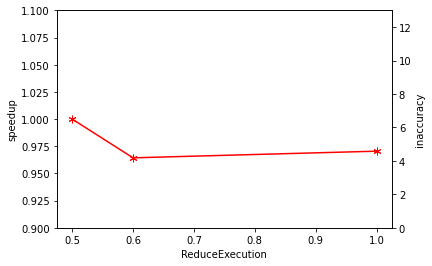

In [77]:
rectangle = mpath.Path.unit_regular_asterisk(6)
circle = mpath.Path.unit_circle()


t = p
s1 = df.loc[df['Algo'] == 'BF']['mean-speedup']
s2 = df.loc[df['Algo'] == 'DJ']['mean-speedup']


fig, ax1 = plt.subplots()

ax1.plot(t, s1, color='red', label='bellman-ford', marker=rectangle, markersize=7)
#ax1.plot(t, s2, color='blue', label='dijkstra', marker=circle, markersize=4)

ax1.set_xlabel('ReduceExecution')
mn, mx = ax1.set_ylim(0.9, 1.1)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 13)
ax2.set_ylabel('inaccuracy')